In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gc


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
pd.set_option('display.max_columns', None)

# TASK 2: DATA UNDERSTANDING


In [60]:
# load the data
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv',nrows=100000)

In [61]:
# sample 10000 instances of the data
df = df_original#.sample(n = 50000)
print("the shape of the data ",df.shape)
df.head()

the shape of the data  (4958347, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [62]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

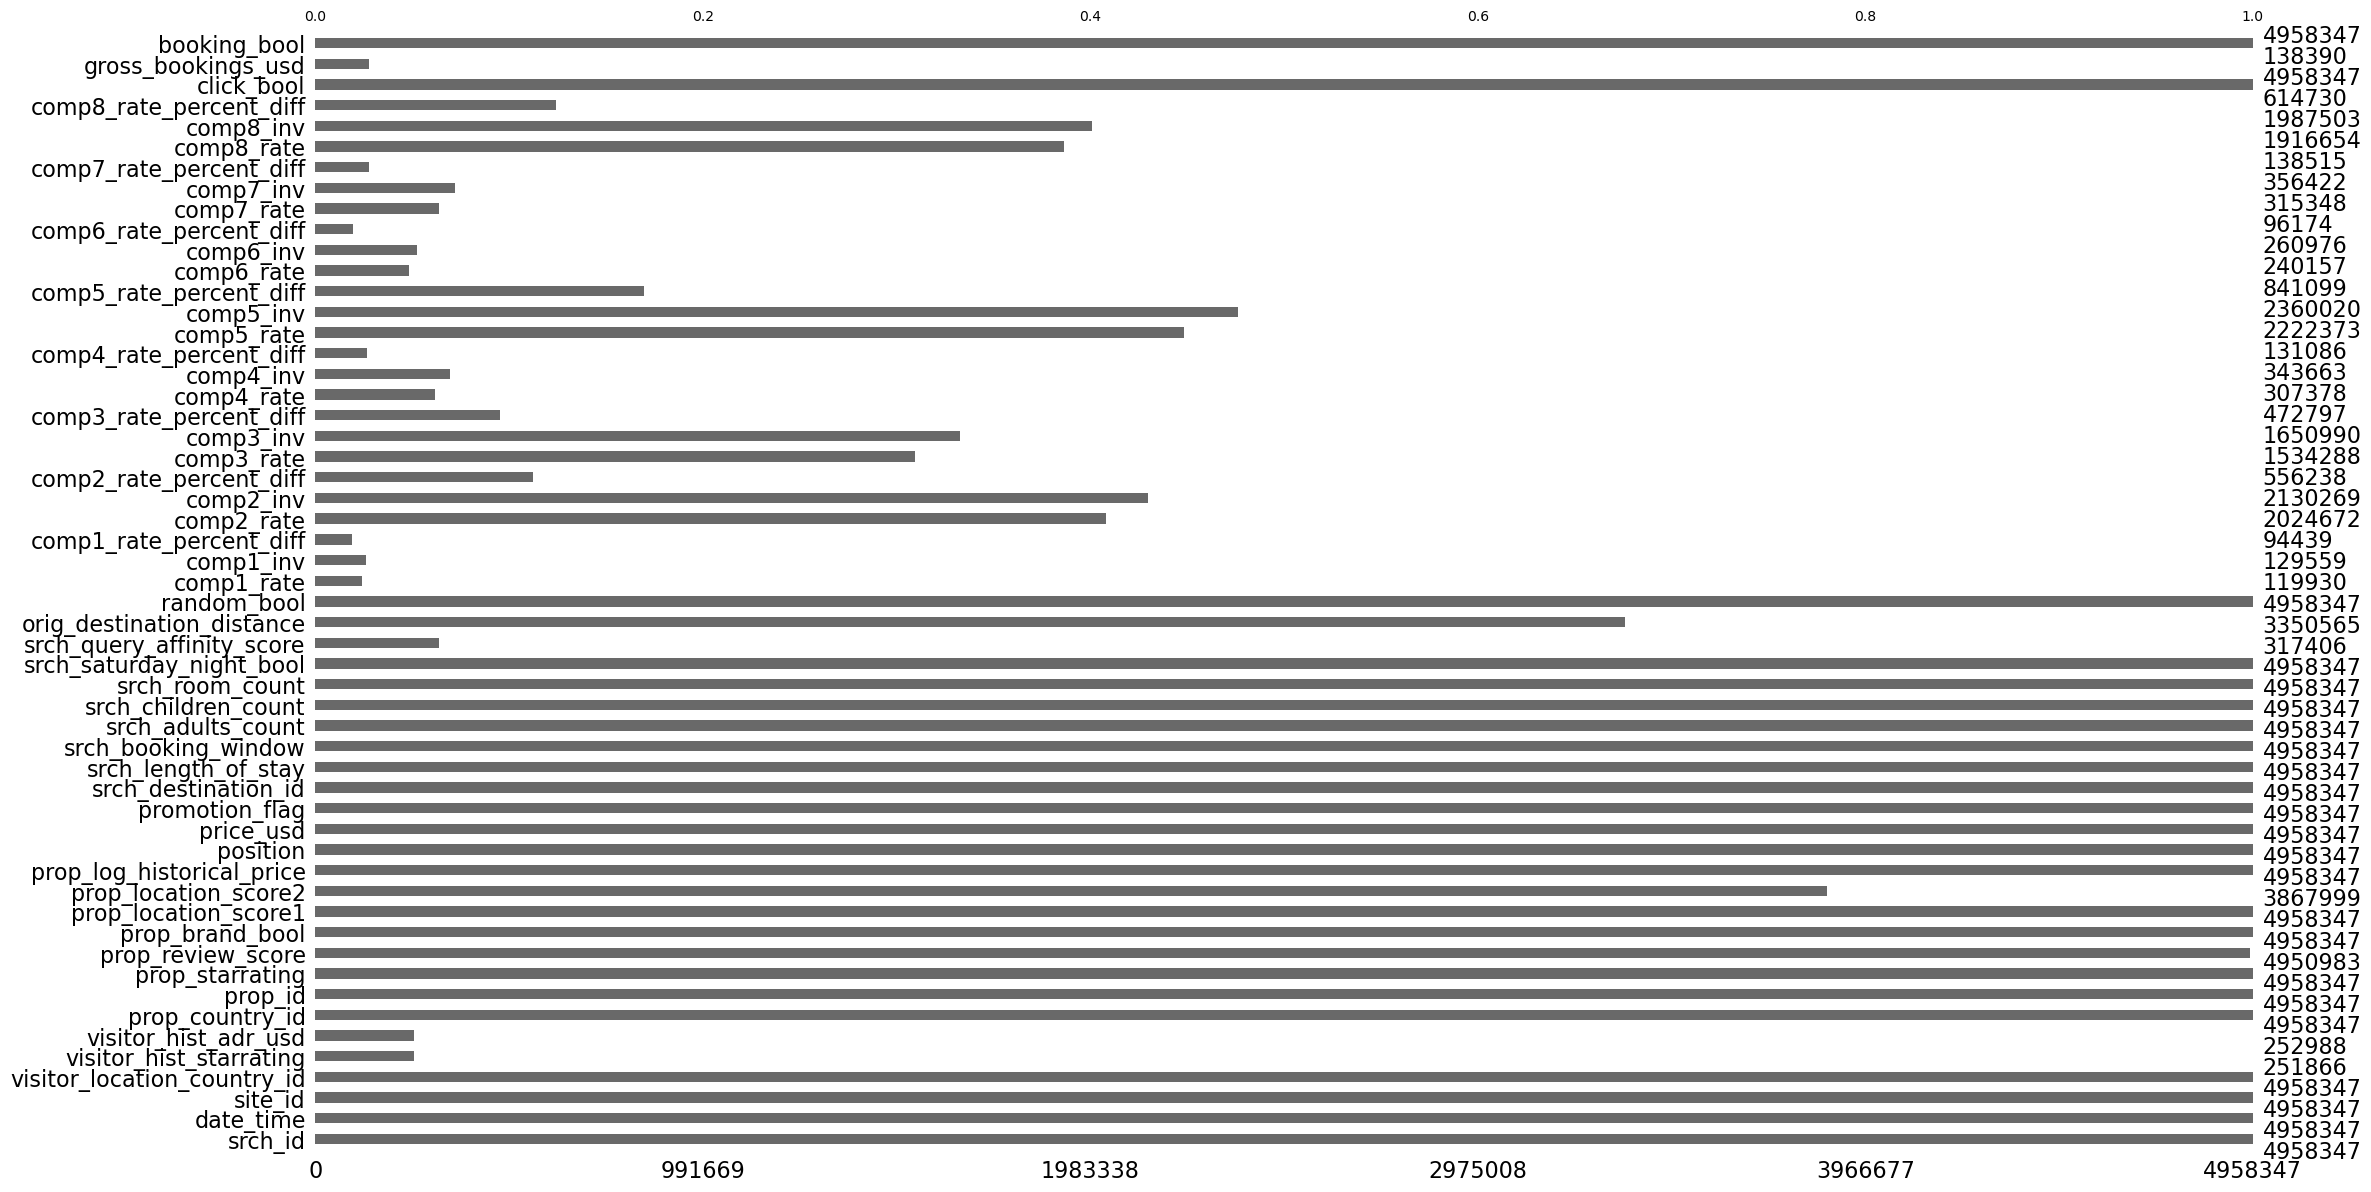

In [63]:
import missingno as msno
# visualize the missing values
msno.bar(df);

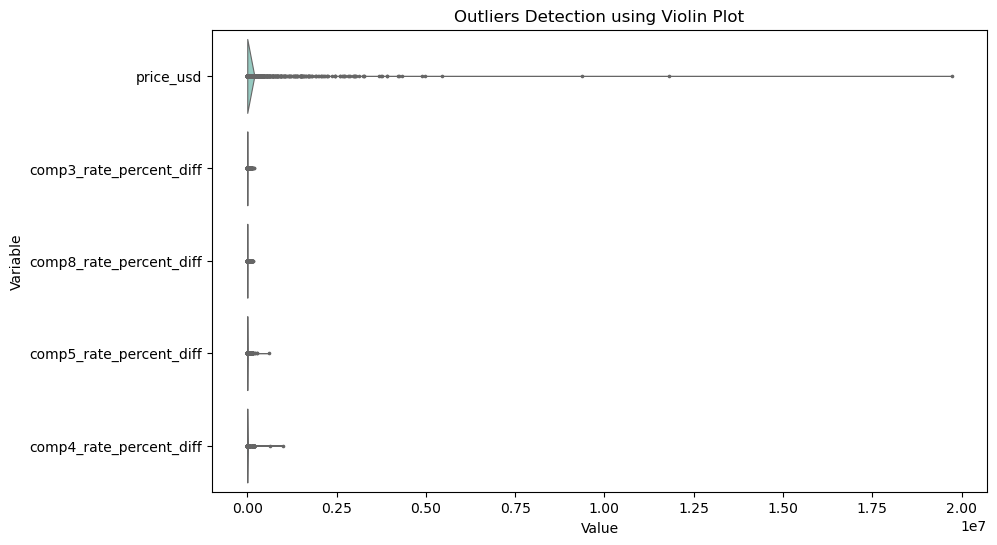

In [64]:
# Select the numeric columns for outlier detection
features = ['price_usd','comp3_rate_percent_diff',
            'comp8_rate_percent_diff','comp5_rate_percent_diff','comp4_rate_percent_diff']


# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[features], inner="points", linewidth=0.8, scale="width", palette="Set3", orient='h')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Outliers Detection using Violin Plot')

# Show the plot
plt.show()

In [65]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,317406.000000,3.350565e+06,4.958347e+06,119930.000000,129559.000000,94439.000000,2.024672e+06,2.130269e+06,556238.000000,1.534288e+06,1.650990e+06,472797.000000,307378.000000,343663.000000,1.310860e+05,2.222373e+06,2.360020e+06,841099.000000,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,1.404263e+04,2.385427e+00,3.747417e+01,1.972637e+00,3.504918e-01,1.110525e+00,5.022127e-01,-24.146418,1.301234e+03,2.959004e-01,0.479788,0.031059,244.229916,4.418987e-02,3.931006e-02,18.490732,1.729010e-02,5.776897e-02,27.071559,-0.016543,0.096653,1.753165e+02,2.267621e-02,5.142880e-02,29.851903,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,8.111843e+03,2.053243e+00,5.199341e+01,8.570628e-01,7.325692e-01,4.172290e-01,4.999952e-01,15.743238,2.023951e+03,4.564465e-01,0.641565,0.229688,1165.448634,4.484236e-01,2.342388e-01,240.113851,4.575808e-01,2.948202e-01,1012.919911,0.578718,0.337165,5.757740e+03,5.217575e-01,2.678363e-01,1340.262382,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.101000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-30.774775,1.398000e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,7.000000,0.000000,0.0

In [66]:
# how many unique user
print(f"Check How many unique user \n{len(df['srch_id'].unique())}\n")

# how many unique prop_id
print(f"Check How many unique prop_id \n{len(df['prop_id'].unique())}\n")

# Full rating matrix will have
print(f"Full rating matrix will have \n{len(df['prop_id'].unique())*len(df['prop_id'].unique())} elements \n")

# TODO check the number of sparsity in the data 

# Check the distribution of the booking_bool variable
print(f"Check the distribution of the booking_bool variable \n{df['booking_bool'].value_counts()}\n")

# Check the distribution of the click_bool variable
print(f"Check the distribution of the click_bool variable \n{df['click_bool'].value_counts()}\n")

# Check the distribution of the visitor_location_country_id 
print(f"Check the distribution of the visitor_location_country_id \n{df['visitor_location_country_id'].value_counts().head()}\n")

# Check the distribution of the visitor_hist_starrating 
print(f"Check the distribution of the visitor_hist_starrating \n{df['visitor_hist_starrating'].value_counts().head()}\n")

# average visitor_hist_starrating for each srch_id
print(f"average visitor_hist_starrating for each srch_id \n{df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna().head()}\n")

# average visitor_location_country_id for each srch_id
print(f"average visitor_location_country_id for each srch_id \n{df.groupby('srch_id')['visitor_location_country_id'].mean().dropna().head()}\n")


Check How many unique user 
199795

Check How many unique prop_id 
129113

Full rating matrix will have 
16670166769 elements 

Check the distribution of the booking_bool variable 
0    4819957
1     138390
Name: booking_bool, dtype: int64

Check the distribution of the click_bool variable 
0    4736468
1     221879
Name: click_bool, dtype: int64

Check the distribution of the visitor_location_country_id 
219    2892489
100     495476
55      290461
216     217385
220     174296
Name: visitor_location_country_id, dtype: int64

Check the distribution of the visitor_hist_starrating 
4.0    23416
3.0    20879
3.5    17088
2.5    10534
2.0     9157
Name: visitor_hist_starrating, dtype: int64

average visitor_hist_starrating for each srch_id 
srch_id
47     4.31
49     2.50
80     2.50
87     3.74
108    3.35
Name: visitor_hist_starrating, dtype: float64

average visitor_location_country_id for each srch_id 
srch_id
1     187.0
4     219.0
6     100.0
8     219.0
11    219.0
Name: visitor_l

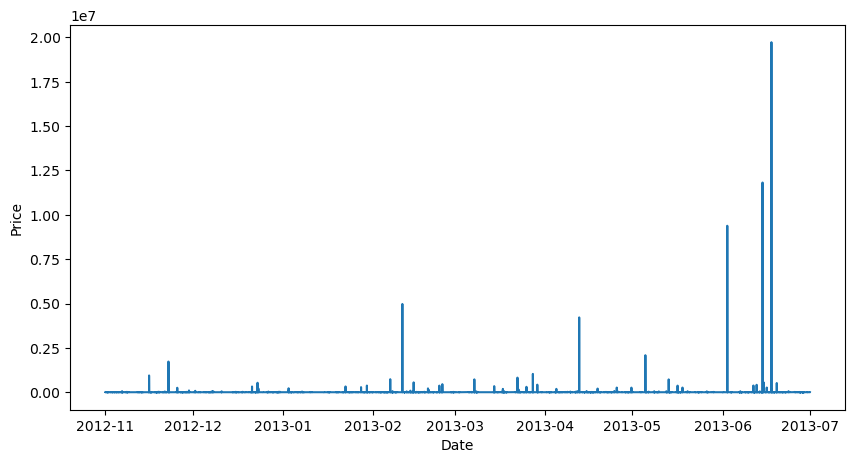

In [67]:
# plot the price against time
df['date_time'] = pd.to_datetime(df['date_time'])  # Convert 'date_time' column to datetime format
df_sorted = df.sort_values('date_time')  # Sort the DataFrame based on 'date_time'

# Plotting the sorted data
plt.figure(figsize=(10,5))
plt.plot(df_sorted['date_time'], df_sorted['price_usd'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

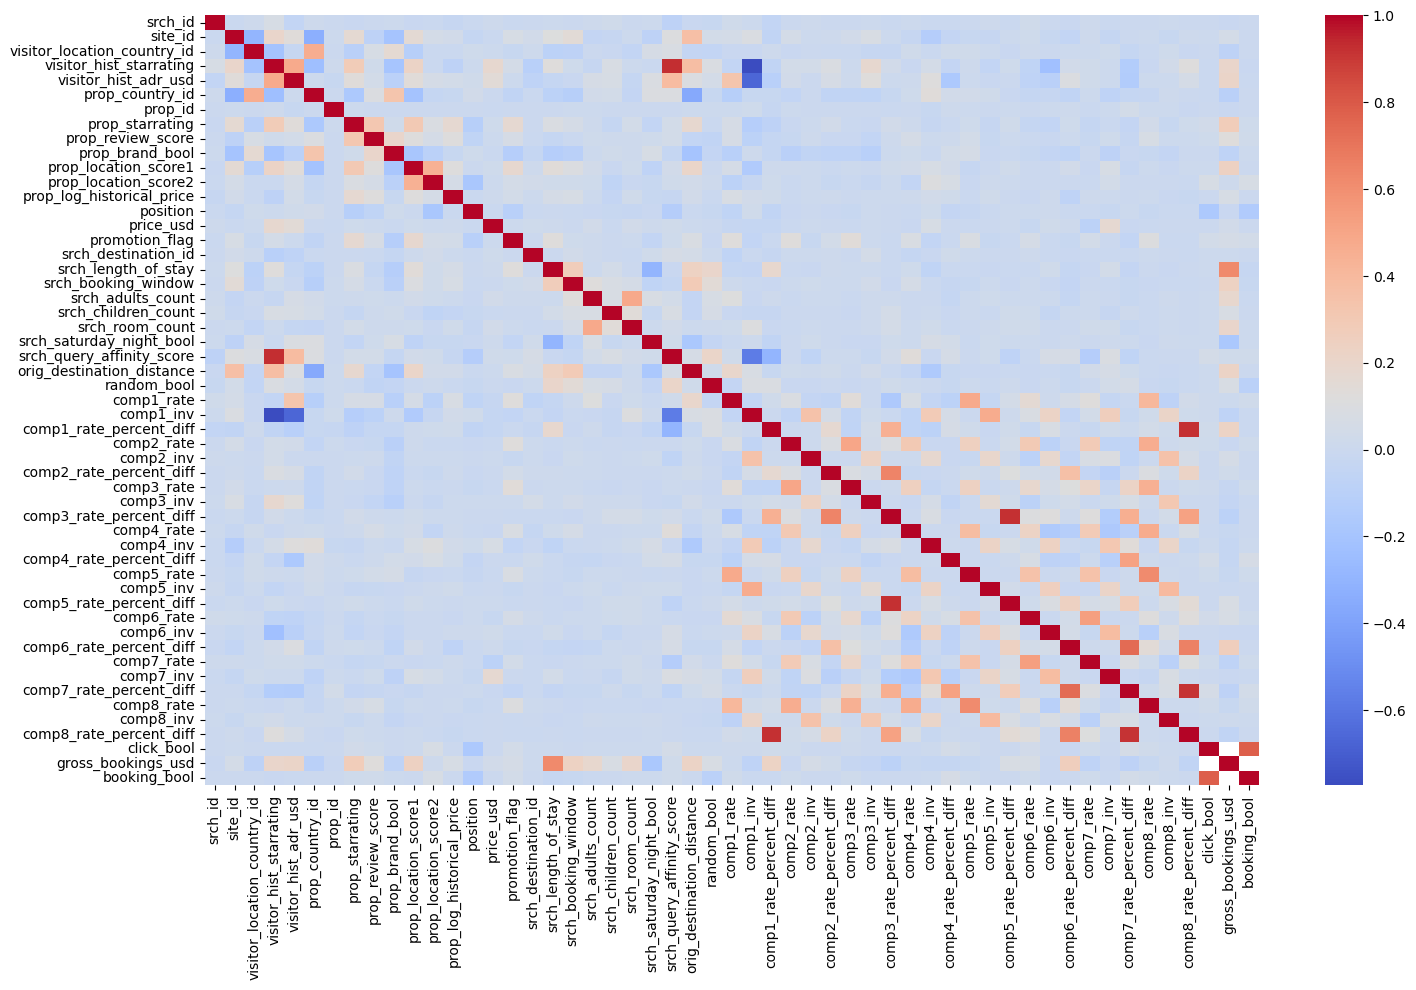

In [26]:
# Visualize the correlation between features
# Create a correlation matrix
corr = df.corr()
# Set up the plot
fig, ax = plt.subplots(figsize=(17, 10))
# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', ax=ax)
# Show the plot
plt.show()

In [68]:
click_bool_1 = df[df['click_bool'] == 1]
click_bool_0 = df[df['click_bool'] == 0]

# spilt the data +1 when the displayed sort was random, 0 when the normal sort order was displayed
display_order = click_bool_1[click_bool_1['random_bool'] == 0]
display_random = click_bool_1[click_bool_1['random_bool'] == 1]

# spilt the data if a property is part of a brand or not  
brand_display_order = display_order[display_order['prop_brand_bool'] == 1]
not_brand_display_order = display_order[display_order['prop_brand_bool'] == 0]

brand_display_random = display_random[display_random['prop_brand_bool'] == 1]
not_brand_display_random = display_random[display_random['prop_brand_bool'] == 0]

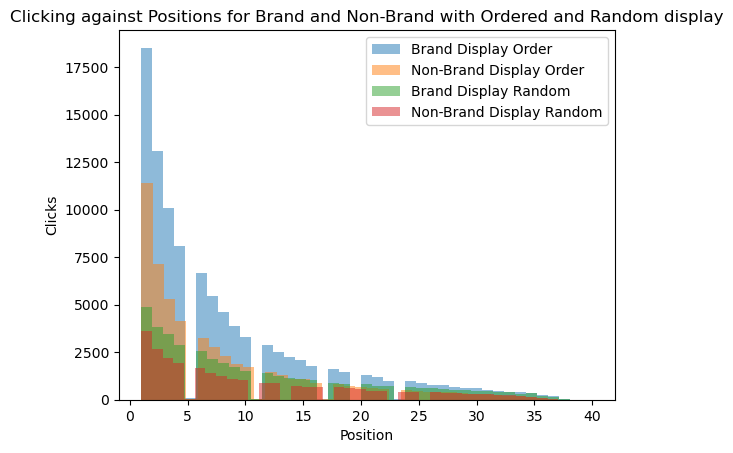

In [69]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['position'], bins=40, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['position'], bins=40, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['position'], bins=40, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['position'], bins=40, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Position')
plt.ylabel('Clicks')
plt.legend()
plt.title('Clicking against Positions for Brand and Non-Brand with Ordered and Random display')

# Show the plot
plt.show()

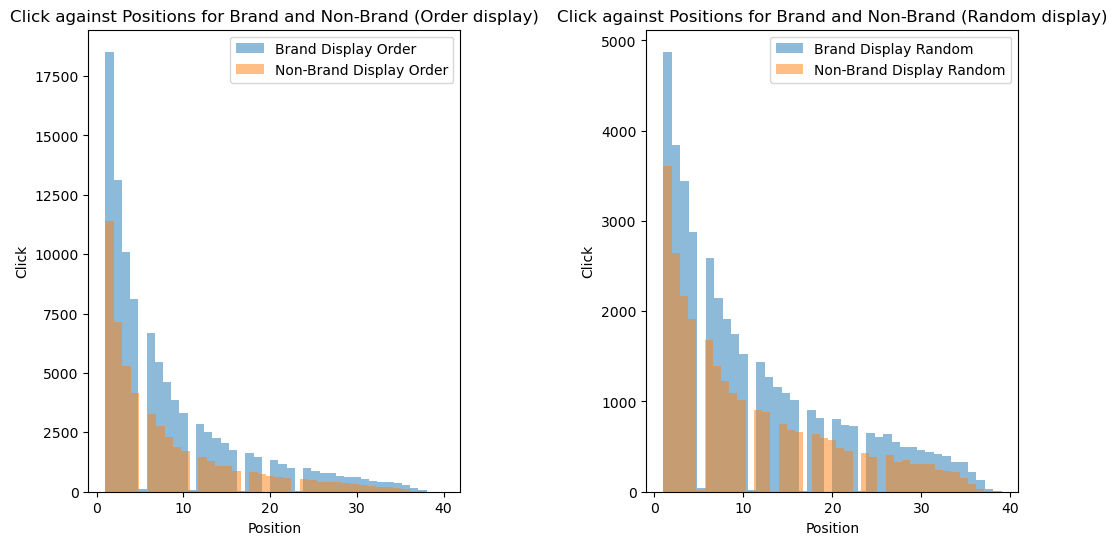

In [70]:
import matplotlib.pyplot as plt

# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'], bins=bins, label='Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'], bins=bins, label='Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click against Positions for Brand and Non-Brand (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'], bins=bins, label='Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'], bins=bins, label='Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click against Positions for Brand and Non-Brand (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


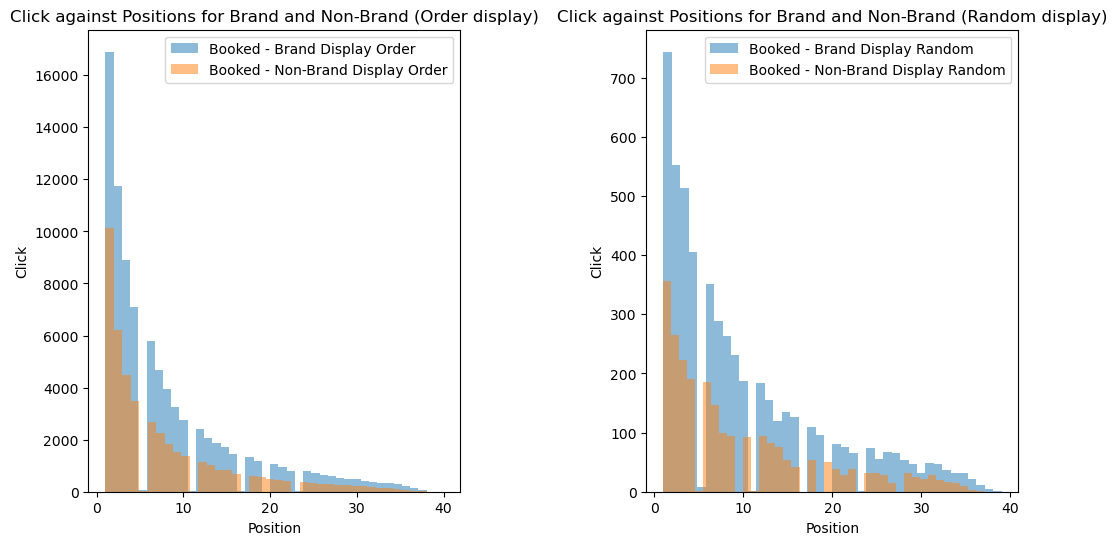

In [71]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click against Positions for Brand and Non-Brand (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click against Positions for Brand and Non-Brand (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()



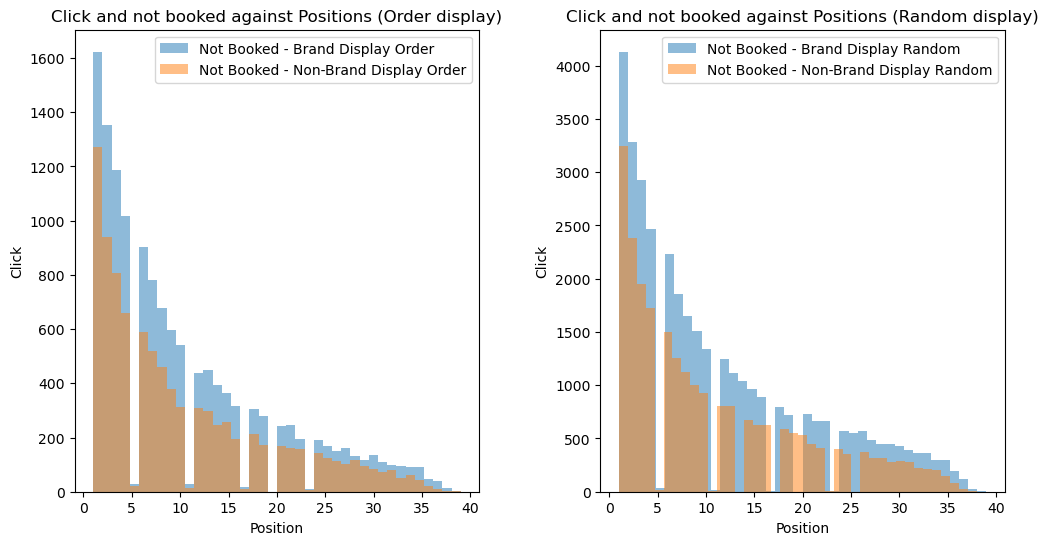

In [72]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click and not booked against Positions (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click and not booked against Positions (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

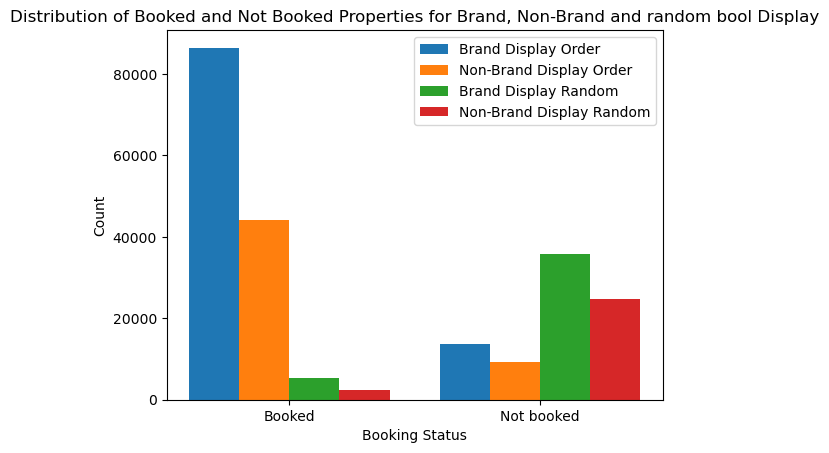

In [73]:
# Count the number of booked and not booked properties for each category
brand_display_order_counts = brand_display_order['booking_bool'].value_counts()
not_brand_display_order_counts = not_brand_display_order['booking_bool'].value_counts()
brand_display_random_counts = brand_display_random['booking_bool'].value_counts()
not_brand_display_random_counts = not_brand_display_random['booking_bool'].value_counts()

# Define the x positions for the bars
bar_width = 0.2
index = np.arange(2)

# Create a bar plot
plt.bar(index, [brand_display_order_counts[1], brand_display_order_counts[0]],width=bar_width, label='Brand Display Order')
plt.bar(index + bar_width, [not_brand_display_order_counts[1], not_brand_display_order_counts[0]],width=bar_width, label='Non-Brand Display Order')
plt.bar(index +2* bar_width,[brand_display_random_counts[1], brand_display_random_counts[0]],width=bar_width, label='Brand Display Random')
plt.bar(index +3* bar_width,[not_brand_display_random_counts[1], not_brand_display_random_counts[0]],width=bar_width, label='Non-Brand Display Random')

# Customize the plot
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(index + 1.5 * bar_width, ['Booked','Not booked'])
plt.legend()
plt.title('Distribution of Booked and Not Booked Properties for Brand, Non-Brand and random bool Display')
# Show the plot
plt.show()

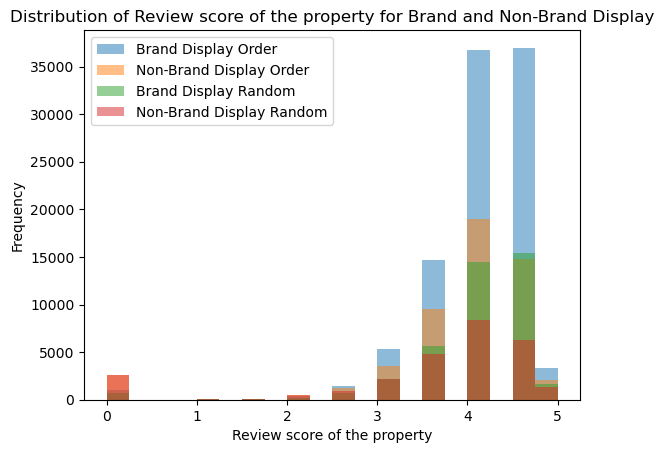

In [74]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['prop_review_score'], bins=20, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['prop_review_score'], bins=20, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['prop_review_score'], bins=20, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['prop_review_score'], bins=20, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Review score of the property')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Review score of the property for Brand and Non-Brand Display')

# Show the plot
plt.show()

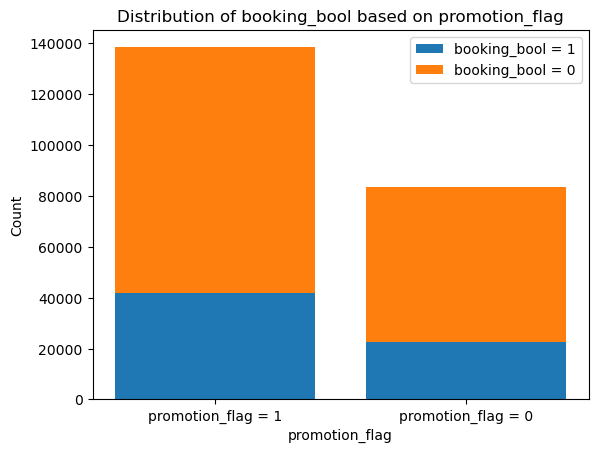

In [75]:
promotion_flag_1 = click_bool_1[click_bool_1['promotion_flag'] == 1]
promotion_flag_0 = click_bool_1[click_bool_1['promotion_flag'] == 0]

promotion_flag_1_book_bool_1 = promotion_flag_1[promotion_flag_1['booking_bool'] == 1]
promotion_flag_1_book_bool_0 = promotion_flag_1[promotion_flag_1['booking_bool'] == 0]

promotion_flag_0_book_bool_1 = promotion_flag_0[promotion_flag_0['booking_bool'] == 1]
promotion_flag_0_book_bool_0 = promotion_flag_0[promotion_flag_0['booking_bool'] == 0]


# Count the occurrences of each value combination
promotion_flag_1_book_bool_1_count = promotion_flag_1_book_bool_1.shape[0]
promotion_flag_1_book_bool_0_count = promotion_flag_1_book_bool_0.shape[0]
promotion_flag_0_book_bool_1_count = promotion_flag_0_book_bool_1.shape[0]
promotion_flag_0_book_bool_0_count = promotion_flag_0_book_bool_0.shape[0]

# Create a list of counts for each value combination
counts = [
    [promotion_flag_1_book_bool_1_count, promotion_flag_1_book_bool_0_count],
    [promotion_flag_0_book_bool_1_count, promotion_flag_0_book_bool_0_count]
]

# Define the labels for the x-axis
labels = ['promotion_flag = 1', 'promotion_flag = 0']

# Define the labels for the legend
legend_labels = ['booking_bool = 1', 'booking_bool = 0']

# Create a stacked bar plot
plt.bar(labels, counts[0], label=legend_labels[0])
plt.bar(labels, counts[1], bottom=counts[0], label=legend_labels[1])

# Customize the plot
plt.xlabel('promotion_flag')
plt.ylabel('Count')
plt.title('Distribution of booking_bool based on promotion_flag')
plt.legend()

# Show the plot
plt.show()


# TASK 3: DATA PREPARATION

In [76]:
def remove_outliers_zscore(df, columns, threshold=3):
    # Calculate the z-scores for the specified columns
    z_scores = df[columns].apply(lambda x: (x - x.mean()) / x.std())
    
    # Identify the rows containing outliers based on the threshold
    outlier_rows = z_scores.abs().apply(lambda x: any(abs(val) > threshold for val in x), axis=1)
    
    # Get the outliers and the cleaned DataFrame
    outliers = df[outlier_rows]
    df_cleaned = df[~outlier_rows]
    
    return df_cleaned, outliers

columns = ['price_usd','comp3_rate_percent_diff',
            'comp8_rate_percent_diff','comp5_rate_percent_diff','comp4_rate_percent_diff']

cleaned_df, outliers = remove_outliers_zscore(df, columns, threshold=2.5)


In [77]:
# to fill the missing value with first quartile
def fill_missing_values_with_first_quartile(df, columns_to_fill):
    # Loop through each column and fill missing values with the first quartile of the respective country
    for column in columns_to_fill:
        # Group the data by country and calculate the first quartile of the column
        first_quartile_by_country = round(df.groupby("prop_country_id")[column].quantile(0.25))
        # Fill missing values in the column with the first quartile of the respective country
        df[column].fillna(df["prop_country_id"].map(first_quartile_by_country), inplace=True)
    
    return df

# Define a list of columns to fill missing values for
columns_to_fill = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2',
                   'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 
                   'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 
                   'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 
                   'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
                   'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
                   'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff']

new_df = fill_missing_values_with_first_quartile(cleaned_df,columns_to_fill)

In [79]:
# fill the missing values with forward filling method 
new_df = new_df.fillna(method='ffill')
# check if still some missing values
new_df.isnull().sum()

srch_id                         0
date_time                       0
site_id                         0
visitor_location_country_id     0
visitor_hist_starrating         0
visitor_hist_adr_usd            0
prop_country_id                 0
prop_id                         0
prop_starrating                 0
prop_review_score               0
prop_brand_bool                 0
prop_location_score1            0
prop_location_score2            0
prop_log_historical_price       0
position                        0
price_usd                       0
promotion_flag                  0
srch_destination_id             0
srch_length_of_stay             0
srch_booking_window             0
srch_adults_count               0
srch_children_count             0
srch_room_count                 0
srch_saturday_night_bool        0
srch_query_affinity_score       0
orig_destination_distance       0
random_bool                     0
comp1_rate                      0
comp1_inv                       0
comp1_rate_per

In [80]:
# drop the features still have a lot of missing values
new_df=new_df.drop(['comp6_rate','comp6_inv','comp6_rate_percent_diff','gross_bookings_usd'],axis=1)

In [81]:
# Features engineer
data = new_df
# convert date_time to year, month, day, and hour
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data = data.drop('date_time', axis=1)

# create new features
data['log_price_diff'] = data['prop_log_historical_price'] - np.log(data['price_usd']+1)

data['star_rank'] = data.groupby('visitor_location_country_id')['prop_starrating'].rank(method='dense', ascending=False)

# Calculate average price by country and star rating
avg_price = data.groupby(['prop_country_id', 'prop_starrating'])['price_usd'].transform('mean')
# Calculate price difference and Add price difference as a new feature
data['price_diff'] = data['price_usd'] - avg_price


# To combine the prop_location_score1 and prop_location_score2 columns to create a new feature that captures 
# the overall location score of the hotel, we can simply add these two columns
data['location_score'] = data['prop_location_score1'] + data['prop_location_score2']

print(data.shape)
data.head()

(4956858, 60)


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,booking_bool,year,month,day,hour,log_price_diff,star_rank,price_diff,location_score
0,1,12,187,3.0,101.0,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,-30.0,121.0,1,0.0,0.0,15.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,12.0,0.0,0.0,7.0,0,0,2013,4,4,8,0.288733,3.0,-27.528261,2.8738
1,1,12,187,3.0,101.0,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,-30.0,121.0,1,0.0,0.0,15.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,1.0,7.0,0.0,0.0,7.0,0.0,0.0,12.0,0.0,0.0,7.0,0,0,2013,4,4,8,-0.115982,2.0,-42.109084,2.2149
2,1,12,187,3.0,101.0,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,-30.0,121.0,1,0.0,0.0,15.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,12.0,0.0,0.0,7.0,0,0,2013,4,4,8,-0.277391,3.0,47.501739,2.2245
3,1,12,187,3.0,101.0,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,-30.0,121.0,1,0.0,0.0,15.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,7.0,0.0,1.0,7.0,0.0,0.0,7.0,0.0,0.0,12.0,-1.0,0.0,5.0,0,0,2013,4,4,8,-2.013193,4.0,516.679007,2.8425
4,1,12,187,3.0,101.0,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,-30.0,121.0,1,0.0,0.0,15.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,12.0,0.0,0.0,7.0,0,0,2013,4,4,8,-0.043833,2.0,-69.269084,2.7641


In [ ]:
#############

# TASK 4: MODELING AND EVALUATION

In [ ]:
# Get unique prop_id values
unique_props = new_df['prop_id'].unique()

# Create a new DataFrame with prop_id as columns and srch_id as index
matrix = pd.DataFrame(0, index=df['srch_id'].unique(), columns=unique_props)

# Fill the matrix with the interaction or rating values
for _, row in new_df.iterrows():
    srch_id = row['srch_id']
    prop_id = row['prop_id']
#     rating1 = row['click_bool']  # You can define your own rating metric
#     rating = row['click_bool'] + 5 * row['booking_bool'] 
    rating =  row['prop_review_score'] + \
             row['comp1_rate'] + row['comp1_inv'] + row['comp1_rate_percent_diff'] + \
             row['comp2_rate'] + row['comp2_inv'] + row['comp2_rate_percent_diff'] + \
             row['comp3_rate'] + row['comp3_inv'] + row['comp3_rate_percent_diff'] + \
             row['comp4_rate'] + row['comp4_inv'] + row['comp4_rate_percent_diff'] + \
             row['comp5_rate'] + row['comp5_inv'] + row['comp5_rate_percent_diff'] + \
             row['comp6_rate'] + row['comp6_inv'] + row['comp6_rate_percent_diff'] + \
             row['comp7_rate'] + row['comp7_inv'] + row['comp7_rate_percent_diff'] + \
             row['comp8_rate'] + row['comp8_inv'] + row['comp8_rate_percent_diff'] +\
             row['visitor_hist_starrating'] + row['prop_location_score1'] + row ['prop_location_score2']

#     rating = +row['prop_review_score']  # You can define your own rating metric

#     matrix.loc[srch_id, prop_id] = rating1
    matrix.loc[srch_id, prop_id] = rating

In [ ]:
# Define the collaborative filtering model
class CollaborativeFiltering(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim):
        super(CollaborativeFiltering, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        self.fc = nn.Linear(embedding_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, item_ids):
        user_embedding = self.user_embedding(user_ids)
        item_embedding = self.item_embedding(item_ids)
        interaction = torch.mul(user_embedding, item_embedding)
        output = self.fc(interaction)
        output = self.sigmoid(output)
        return output.squeeze()

# Custom Dataset for collaborative filtering
class CollaborativeFilteringDataset(Dataset):
    def __init__(self, df, user_mapping, item_mapping):
        self.df = df
        self.user_mapping = user_mapping
        self.item_mapping = item_mapping

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user_id = self.df.loc[idx, 'srch_id']
        item_id = self.df.loc[idx, 'prop_id']
        rating = self.df.loc[idx, 'prop_review_score']
        user_idx = self.user_mapping[user_id]
        item_idx = self.item_mapping[item_id]
        return user_idx, item_idx, rating

# Normalize the ratings to be between 0 and 1
df['prop_review_score'] = (df['prop_review_score'] - df['prop_review_score'].min()) / (df['prop_review_score'].max() - df['prop_review_score'].min())

# Load the dataset
df = df1.drop(['position','click_bool','booking_bool','gross_bookings_usd'], axis=1)

df.fillna(0, inplace=True)


# Create user and item mappings
user_mapping = {user_id: i for i, user_id in enumerate(df['srch_id'].unique())}
item_mapping = {item_id: i for i, item_id in enumerate(df['prop_id'].unique())}

# Create the collaborative filtering dataset
dataset = CollaborativeFilteringDataset(df, user_mapping, item_mapping)

# Define hyperparameters
num_users = len(user_mapping)
num_items = len(item_mapping)
embedding_dim = 32
lr = 0.01
num_epochs = 10
batch_size = 64

# Create data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create the collaborative filtering model
model = CollaborativeFiltering(num_users, num_items, embedding_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for user_ids, item_ids, ratings in dataloader:
        optimizer.zero_grad()
        outputs = model(user_ids, item_ids)
        outputs = torch.sigmoid(outputs)  # Apply sigmoid activation


        loss = criterion(outputs, ratings.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


# Function to get the ranked properties for a user search
def get_ranked_properties(srch_id):
    user_id = user_mapping[srch_id]
    item_ids = torch.arange(num_items)
    with torch.no_grad():
        outputs = model(torch.full((num_items,), user_id, dtype=torch.long), item_ids)
    ranked_properties = item_ids[outputs.argsort(descending=True)]
    return [item for item in ranked_properties]

# Example usage: Get the ranked properties for srch_id = 1
ranked_properties = get_ranked_properties(1)

# Map the ranked item indices back to item IDs
reverse_item_mapping = {v: k for k, v in item_mapping.items()}
ranked_properties = [reverse_item_mapping[item_idx.item()] for item_idx in ranked_properties]

# Print the ranked properties
print("Ranked Properties for srch_id = 1 (Most likely to be booked):")
print(ranked_properties[:10])


In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader

# Load the test set
test_set = pd.read_csv('test_set_VU_DM.csv', nrows=1000)

# Create a mapping for user and item IDs in the test set
test_user_mapping = {user_id: i for i, user_id in enumerate(test_set['srch_id'].unique())}
test_item_mapping = {item_id: i for i, item_id in enumerate(test_set['prop_id'].unique())}

# Create the collaborative filtering dataset for the test set
test_dataset = CollaborativeFilteringDataset(test_set, test_user_mapping, test_item_mapping)

# Create a data loader for the test set
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Evaluate the model on the test set
model.eval()
predictions = []

with torch.no_grad():
    for user_ids, item_ids, _ in test_dataloader:
        outputs = model(user_ids, item_ids)
        predictions.extend(outputs.tolist())

# Map the predicted ratings back to item IDs
reverse_test_item_mapping = {v: k for k, v in test_item_mapping.items()}
predicted_properties = [reverse_test_item_mapping.get(int(item_idx), 'Unknown') for item_idx in range(len(predictions))]

# Combine the predicted properties with the test set
test_set['predicted_booking_prob'] = predictions
test_set['predicted_prop_id'] = predicted_properties

# Calculate the accuracy
correct_predictions = 0
total_predictions = len(predictions)

for i in range(total_predictions):
    if predicted_properties[i] == test_set['prop_id'][i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions

print(f"Accuracy on the test set: {accuracy}")

# Sort the test set based on predicted booking probability in descending order
sorted_test_set = test_set.sort_values('predicted_booking_prob', ascending=False)

# # Function to generate the ranked properties file
# def generate_ranked_properties_file(test_set, ranked_properties):
#     ranked_properties_df = pd.DataFrame(ranked_properties, columns=['SearchId', 'PropertyId'])
#     ranked_properties_df.to_csv('ranked_properties.csv', index=False)

# Function to get the ranked properties for a user search in the test set
def get_ranked_properties_test(srch_id):
    user_id = test_user_mapping[srch_id]
    item_ids = torch.arange(len(test_item_mapping))
    with torch.no_grad():
        outputs = model(torch.full((len(test_item_mapping),), user_id, dtype=torch.long), item_ids)
    ranked_properties = [(srch_id, reverse_test_item_mapping[int(item)]) for item in item_ids[outputs.argsort(descending=True)]]
    return ranked_properties

# Example usage: Get the ranked properties for srch_id = 1 in the test set
srch_id = 1
ranked_properties_test = get_ranked_properties_test(srch_id)

# Print the top 10 ranked properties for the given srch_id
print(f"Top 10 Ranked Properties for srch_id = {srch_id}:")
for i, (search_id, property_id) in enumerate(ranked_properties_test[:10]):
    print(f"Rank {i+1}: Search ID {search_id}, Property ID {property_id}")


In [ ]:
# perform principal component analysis to reduce the dimensionality
from sklearn.decomposition import PCA
def perform_pca(df, pca_dict, dimensions):
    for feature_set_name, feature_set in pca_dict.items():
        # Select the columns corresponding to the numeric features
        data = df[feature_set]        
        # Drop old features from the original DataFrame
        df = df.drop(columns=feature_set)        
        # Perform PCA
        pca = PCA(n_components=dimensions)
        transformed_data = pca.fit_transform(data)        
        # Create a new DataFrame with the transformed data and use the dictionary element name as column name
        new_df = pd.DataFrame(transformed_data, columns=[f"{feature_set_name}_{i+1}" for i in range(dimensions)])        
        # Concatenate the new DataFrame with the original DataFrame
        df = pd.concat([df, new_df], axis=1)    
    return df

pca_dict={'comp_rate_pca':['comp1_rate','comp2_rate','comp3_rate',
                              'comp4_rate','comp5_rate','comp7_rate','comp8_rate'],
         'comp_inv_pca':['comp1_inv','comp2_inv','comp3_inv',
                              'comp4_inv','comp5_inv','comp7_inv','comp8_inv'],
         'comp_rate_percent_diff_pca':['comp1_rate_percent_diff','comp2_rate_percent_diff','comp3_rate_percent_diff',
                              'comp4_rate_percent_diff','comp5_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff']}
new_df1= perform_pca(new_df,pca_dict,1)
new_df1.head()

In [ ]:
####################################################

In [ ]:
# for balance the target classes 
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.booking_bool==0]
df_minority = df[df.booking_bool==1]

# Downsample the majority class to match the minority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,   # sample without replacement
                                   n_samples=len(df_minority),  # match number in minority class
                                   random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check the class distribution
print(df_balanced.booking_bool.value_counts())

In [ ]:
df_balanced.to_csv('expedia_balanced.csv', index=False)


In [ ]:
from sklearn.neighbors import NearestNeighbors

# create the user-hotel matrix
user_hotel_matrix = df.pivot_table(values='booking_bool', index='visitor_location_country_id', columns='prop_id', fill_value=0)
# create a nearest neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')

# fit the model to the user-hotel matrix
model.fit(user_hotel_matrix)

# get the nearest neighbors for a given user
user_index = 1
distances, indices = model.kneighbors(user_hotel_matrix.iloc[user_index,:].values.reshape(1, -1), n_neighbors=5)

# use the nearest neighbors to make predictions for the user
c = user_hotel_matrix.iloc[indices[0],:].mean(axis=0)

print(c)

In [ ]:
user_hotel_matrix.shape

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Get a list of all binary variables in the dataset
binary_vars = [col for col in df.columns if df[col].dtype == 'int64']

# Get a list of all continuous variables in the dataset
continuous_vars = [col for col in df.columns if df[col].dtype == 'float64']

# Calculate the point-biserial correlation coefficient for each pair of variables
results = []
# for binary_var in binary_vars:
for continuous_var in continuous_vars:
    r_pb, p_value = pearsonr(df['booking_boll'], df[continuous_var])
    results.append((binary_var, continuous_var, r_pb, p_value))

# Convert the results to a pandas DataFrame and save to a CSV file
df_results = pd.DataFrame(results, columns=['binary_var', 'continuous_var', 'r_pb', 'p_value'])
# df_results.to_csv('expedia_point_biserial_correlations.csv', index=False)

# Print the results for the top 10 correlations
top_correlations = df_results.sort_values(by='r_pb', ascending=False).head(10)
print(top_correlations)
